In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clinvar-conflicting/clinvar_conflicting.csv


In [2]:
gen_var = pd.read_csv('/kaggle/input/clinvar-conflicting/clinvar_conflicting.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
gen_var.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [4]:
tot_cols = gen_var.columns

In [5]:
# INFO of the data set
gen_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [6]:
# Find the nulls
gen_var.isnull().sum().sort_values(ascending = False)

MOTIF_SCORE_CHANGE    65186
HIGH_INF_POS          65186
MOTIF_POS             65186
MOTIF_NAME            65186
DISTANCE              65080
SSR                   65058
CLNSIGINCL            65021
CLNDNINCL             65021
CLNDISDBINCL          65021
INTRON                56385
PolyPhen              40392
SIFT                  40352
BLOSUM62              39595
CLNVI                 37529
BAM_EDIT              33219
Codons                10004
Amino_acids           10004
Protein_position       9955
CDS_position           9955
EXON                   8893
cDNA_position          8884
LoFtool                4213
CADD_PHRED             1092
CADD_RAW               1092
MC                      846
SYMBOL                   16
BIOTYPE                  16
Feature_type             14
Feature                  14
STRAND                   14
Allele                    0
CLNDISDB                  0
POS                       0
REF                       0
ALT                       0
AF_ESP              

In [7]:
# Drop columns with nulls more than 65000
cols_with_max_nulls = ['MOTIF_SCORE_CHANGE', 'HIGH_INF_POS', 'MOTIF_POS', 'MOTIF_NAME', 'DISTANCE', 'SSR', 'CLNSIGINCL', 'CLNDNINCL', 'CLNDISDBINCL']
gen_var.drop(cols_with_max_nulls, axis = 1, inplace = True)

In [8]:
cols = gen_var.isnull().sum().sort_values(ascending = False)
cols.index

Index(['INTRON', 'PolyPhen', 'SIFT', 'BLOSUM62', 'CLNVI', 'BAM_EDIT', 'Codons',
       'Amino_acids', 'Protein_position', 'CDS_position', 'EXON',
       'cDNA_position', 'LoFtool', 'CADD_RAW', 'CADD_PHRED', 'MC', 'SYMBOL',
       'BIOTYPE', 'Feature_type', 'STRAND', 'Feature', 'CLNDISDB', 'POS',
       'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNHGVS', 'CLNDN',
       'CLNVC', 'ORIGIN', 'CLASS', 'Allele', 'Consequence', 'IMPACT', 'CHROM'],
      dtype='object')

In [9]:
null_cols = []
for col in cols.index:
    if gen_var[col].isnull().sum() > 0:
        null_cols.append(col)

In [10]:
for col in null_cols:
    print(col+' '+str(len(gen_var[col].unique())))
    print(gen_var[col].unique())
    print()

INTRON 1930
[nan '6/27' '8/17' ... '32/52' '12/47' '2/47']

PolyPhen 5
['benign' 'probably_damaging' nan 'possibly_damaging' 'unknown']

SIFT 5
['tolerated' 'deleterious_low_confidence' 'deleterious' nan
 'tolerated_low_confidence']

BLOSUM62 7
[ 2. -3. -1. nan -2.  1.  3.]

CLNVI 27655
['UniProtKB_(protein):Q96L58#VAR_059317'
 'OMIM_Allelic_Variant:616101.0001|UniProtKB_(protein):Q5SV17#VAR_071909'
 'OMIM_Allelic_Variant:139380.0002|UniProtKB_(protein):P62873#VAR_076648'
 ...
 'ARUP_Laboratories,_Molecular_Genetics_and_Genomics:149220|Illumina_Clinical_Services_Laboratory,Illumina:582677'
 'ARUP_Laboratories,_Molecular_Genetics_and_Genomics:153352|Illumina_Clinical_Services_Laboratory,Illumina:746218'
 'Illumina_Clinical_Services_Laboratory,Illumina:628413']

BAM_EDIT 3
[nan 'OK' 'FAILED']

Codons 2221
['gaG/gaC' 'cCg/cTg' 'aTc/aCc' ... 'ttg/tATtg' 'gac/gTCGac' 'tTACTC/t']

Amino_acids 1263
['E/D' 'P/L' 'I/T' ... '-/FGX' 'L/YX' 'D/VD']

Protein_position 7340
['174' '170' '80' ... '258

In [11]:
null_cols

['INTRON',
 'PolyPhen',
 'SIFT',
 'BLOSUM62',
 'CLNVI',
 'BAM_EDIT',
 'Codons',
 'Amino_acids',
 'Protein_position',
 'CDS_position',
 'EXON',
 'cDNA_position',
 'LoFtool',
 'CADD_RAW',
 'CADD_PHRED',
 'MC',
 'SYMBOL',
 'BIOTYPE',
 'Feature_type',
 'STRAND',
 'Feature']

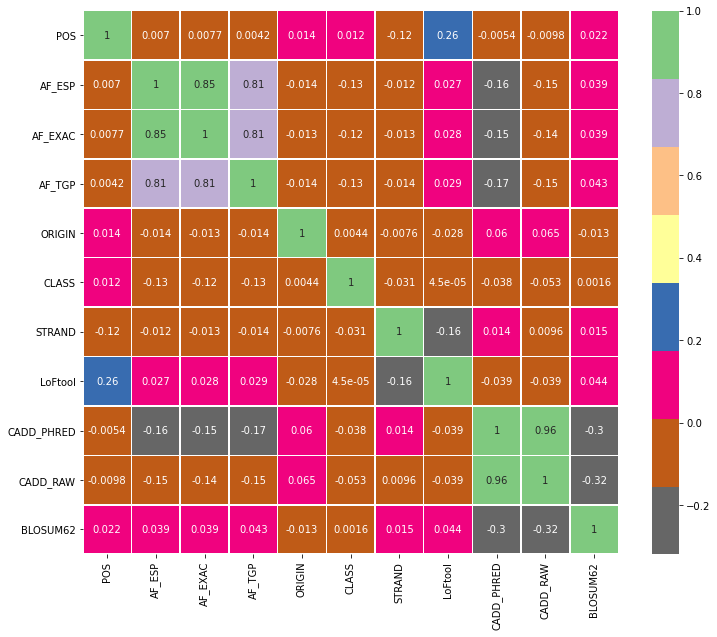

In [12]:
plt.figure(figsize = (12, 10))
sns.heatmap(gen_var.corr(), annot = True, linewidths=.5, cmap = plt.cm.Accent_r)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(gen_var.corr(), 0.8)

In [15]:
# Drop the correlated features
gen_var.drop(corr_features, axis = 1, inplace = True)

In [16]:
gen_var.shape
null_cols

['INTRON',
 'PolyPhen',
 'SIFT',
 'BLOSUM62',
 'CLNVI',
 'BAM_EDIT',
 'Codons',
 'Amino_acids',
 'Protein_position',
 'CDS_position',
 'EXON',
 'cDNA_position',
 'LoFtool',
 'CADD_RAW',
 'CADD_PHRED',
 'MC',
 'SYMBOL',
 'BIOTYPE',
 'Feature_type',
 'STRAND',
 'Feature']

In [17]:
# INTRON
gen_var.drop('INTRON', axis = 1, inplace = True)

In [18]:
# Polyphen 
print(gen_var['PolyPhen'].mode())
gen_var['PolyPhen'].fillna(value = 'benign', inplace = True)

0    benign
dtype: object


In [19]:
# SIFT
print(gen_var['SIFT'].isnull().sum())
print(gen_var['SIFT'].unique())
print(gen_var['SIFT'].mode())
gen_var['SIFT'].fillna('deleterious', inplace = True)

40352
['tolerated' 'deleterious_low_confidence' 'deleterious' nan
 'tolerated_low_confidence']
0    deleterious
dtype: object


In [20]:
# BLOSUM62
print(gen_var['BLOSUM62'].isnull().sum())
print(gen_var['BLOSUM62'].unique())
print(gen_var['BLOSUM62'].mode())
gen_var['BLOSUM62'] = gen_var['BLOSUM62'].fillna(1.0)

39595
[ 2. -3. -1. nan -2.  1.  3.]
0    1.0
dtype: float64


In [21]:
# CLNVI
print(gen_var['CLNVI'].isnull().sum())
print(gen_var['CLNVI'].unique())
gen_var.drop('CLNVI', axis = 1, inplace = True)

37529
['UniProtKB_(protein):Q96L58#VAR_059317'
 'OMIM_Allelic_Variant:616101.0001|UniProtKB_(protein):Q5SV17#VAR_071909'
 'OMIM_Allelic_Variant:139380.0002|UniProtKB_(protein):P62873#VAR_076648'
 ...
 'ARUP_Laboratories,_Molecular_Genetics_and_Genomics:149220|Illumina_Clinical_Services_Laboratory,Illumina:582677'
 'ARUP_Laboratories,_Molecular_Genetics_and_Genomics:153352|Illumina_Clinical_Services_Laboratory,Illumina:746218'
 'Illumina_Clinical_Services_Laboratory,Illumina:628413']


In [22]:
# BAM_EDIT
print(gen_var['BAM_EDIT'].isnull().sum())
print(gen_var['BAM_EDIT'].unique())
print(gen_var['BAM_EDIT'].mode())
gen_var['BAM_EDIT'] = gen_var['BAM_EDIT'].fillna('OK')

33219
[nan 'OK' 'FAILED']
0    OK
dtype: object


In [23]:
# Codons
print(gen_var['Codons'].isnull().sum())
print(gen_var['Codons'].unique())
print(gen_var['Codons'].mode())
gen_var['Codons'] = gen_var['Codons'].fillna('cGg/cAg')

10004
['gaG/gaC' 'cCg/cTg' 'aTc/aCc' ... 'ttg/tATtg' 'gac/gTCGac' 'tTACTC/t']
0    cGg/cAg
dtype: object


In [24]:
# Amino_acids
print(gen_var['Amino_acids'].isnull().sum())
print(gen_var['Amino_acids'].unique())
mode_Amino_acids = gen_var['Amino_acids'].mode()
print(mode_Amino_acids)
gen_var['Amino_acids'] = gen_var['Amino_acids'].fillna('A')
gen_var[gen_var['Amino_acids'] == 'A']

10004
['E/D' 'P/L' 'I/T' ... '-/FGX' 'L/YX' 'D/VD']
0    A
dtype: object


,CHROM,POS,REF,ALT,AF_ESP,CLNDISDB,CLNDN,CLNHGVS,CLNVC,MC,...,Protein_position,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62
1226,3,38655243,C,T,0.0003,"MedGen:C1142166,Orphanet:ORPHA130,SNOMED_CT:41...",Brugada_syndrome|not_specified|Brugada_syndrom...,NC_000003.11:g.38655243C>T,single_nucleotide_variant,"SO:0001583|missense_variant,SO:0001627|intron_...",...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.000413,20.700,1.0
1227,3,38655260,G,A,0.0000,"MedGen:C1142166,Orphanet:ORPHA130,SNOMED_CT:41...",Brugada_syndrome|not_specified,NC_000003.11:g.38655260G>A,single_nucleotide_variant,"SO:0001583|missense_variant,SO:0001627|intron_...",...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.000413,19.410,1.0
1228,3,38655264,G,A,0.0001,"EFO:EFO_0005137,MedGen:C2748542|MedGen:C114189...","Cardiac_conduction_defect,_nonspecific|Congeni...",NC_000003.11:g.38655264G>A,single_nucleotide_variant,"SO:0001583|missense_variant,SO:0001627|intron_...",...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.000413,18.780,1.0
1229,3,38655272,C,T,0.0000,"EFO:EFO_0000407,Human_Phenotype_Ontology:HP:00...",Primary_dilated_cardiomyopathy|Congenital_long...,NC_000003.11:g.38655272C>T,single_nucleotide_variant,"SO:0001583|missense_variant,SO:0001627|intron_...",...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.000413,20.200,1.0
1230,3,38655278,G,A,0.0003,"MedGen:C1142166,Orphanet:ORPHA130,SNOMED_CT:41...",Brugada_syndrome|Dilated_cardiomyopathy_1E|Sic...,NC_000003.11:g.38655278G>A,single_nucleotide_variant,"SO:0001583|missense_variant,SO:0001627|intron_...",...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.000413,20.700,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65173,X,153991099,C,G,0.0000,"MedGen:C1148551,OMIM:305000|MedGen:CN169374|Me...",Dyskeratosis_congenita_X-linked|not_specified|...,NC_000023.10:g.153991099C>G,single_nucleotide_variant,SO:0001623|5_prime_UTR_variant,...,NaN,A,cGg/cAg,1.0,OK,deleterious,benign,NaN,6.581,1.0
65177,X,154004584,C,T,0.0888,MedGen:CN169374,not_specified,NC_000023.10:g.154004584C>T,single_nucleotide_variant,"SO:0001624|3_prime_UTR_variant,SO:0001819|syno...",...,487,A,gcC/gcT,1.0,OK,deleterious,benign,NaN,14.260,1.0
65180,X,154005148,G,A,0.0708,MedGen:CN169374,not_specified,NC_000023.10:g.154005148G>A,single_nucleotide_variant,SO:0001624|3_prime_UTR_variant,...,NaN,A,cGg/cAg,1.0,OK,deleterious,benign,NaN,6.255,1.0
65181,X,154065843,G,A,0.0159,MedGen:CN169374|MedGen:CN239152,"not_specified|Hemophilia_A,_FVIII_Deficiency",NC_000023.10:g.154065843G>A,single_nucleotide_variant,SO:0001624|3_prime_UTR_variant,...,NaN,A,cGg/cAg,-1.0,OK,deleterious,benign,0.001580,3.007,1.0


In [25]:
# Protein_position
print(gen_var['Protein_position'].isnull().sum())
print(gen_var['Protein_position'].unique())
mode_Protein_position = gen_var['Protein_position'].mode()
print(mode_Protein_position)
gen_var['Protein_position'].fillna('1', inplace = True)

9955
['174' '170' '80' ... '258-260' '2593-2594' '2212-2213']
0    1
dtype: object


In [26]:
# Codons
print(gen_var['Codons'].isnull().sum())
print(gen_var['Codons'].unique())
mode_Codons = gen_var['Codons'].mode()
mode_Codons
gen_var['Codons'].fillna('cGg/cAg', inplace = True)

0
['gaG/gaC' 'cCg/cTg' 'aTc/aCc' ... 'ttg/tATtg' 'gac/gTCGac' 'tTACTC/t']


In [27]:
# CDS_position
print(gen_var['CDS_position'].isnull().sum())
print(gen_var['CDS_position'].unique())
mode_Codons = gen_var['CDS_position'].mode()
gen_var['CDS_position'].fillna('1', inplace = True)

9955
['522' '509' '239' ... '248-252' '1491-1492' '1492-1494']


In [28]:
# EXON
print(gen_var['EXON'].isnull().sum())
print(gen_var['EXON'].unique())
mode_Codons = gen_var['EXON'].mode()
gen_var['EXON'].fillna('16/16', inplace = True)

8893
['1/1' '4/4' '6/12' ... '38/45' '39/45' '30/53']


In [29]:
 'CADD_RAW',
 'CADD_PHRED',
 'MC',
 'SYMBOL',
 'BIOTYPE',
 'Feature_type',
 'STRAND',
 'Feature'

'Feature'

In [30]:
# cDNA_position
print(gen_var['cDNA_position'].isnull().sum())
print(gen_var['cDNA_position'].unique())
mode_Codons = gen_var['cDNA_position'].mode()
mode_Codons
gen_var['cDNA_position'].fillna('852', inplace = True)

8884
['552' '523' '632' ... '496-500' '1701-1702' '1702-1704']


In [31]:
# LoFtool
print(gen_var['LoFtool'].isnull().sum())
print(gen_var['LoFtool'].unique())
mode_Codons = gen_var['LoFtool'].mode()
gen_var['LoFtool'].fillna(0.971, inplace = True)

4213
[   nan 0.101  0.021  ... 0.413  0.0837 0.0169]


In [32]:
# CADD_PHRED
print(gen_var['CADD_PHRED'].isnull().sum())
print(gen_var['CADD_PHRED'].unique())
mode_Codons = gen_var['CADD_PHRED'].mode()
gen_var['CADD_PHRED'].fillna(34.0, inplace = True)

1092
[ 1.053 31.    28.1   ...  2.688  9.021  3.007]


In [33]:
# MC
print(gen_var['MC'].isnull().sum())
# print(gen_var['MC'].unique())
mode_Codons = gen_var['MC'].mode()
mode_Codons
gen_var['MC'].fillna('SO:0001583|missense_variant', inplace = True)

846


In [34]:
# SYMBOL
print(gen_var['SYMBOL'].isnull().sum())
print(gen_var['SYMBOL'].unique())
mode_Codons = gen_var['SYMBOL'].mode()
mode_Codons
gen_var['SYMBOL'].fillna('TTN', inplace = True)

16
['B3GALT6' 'TMEM240' 'GNB1' ... 'DKC1' 'RAB39B' 'CLIC2']


In [35]:
# BIOTYPE
print(gen_var['BIOTYPE'].isnull().sum())
print(gen_var['BIOTYPE'].unique())
mode_Codons = gen_var['BIOTYPE'].mode()
mode_Codons
gen_var['BIOTYPE'].fillna('protein_coding', inplace = True)

16
['protein_coding' 'misc_RNA' nan]


In [36]:
# Feature_type
print(gen_var['Feature_type'].isnull().sum())
print(gen_var['Feature_type'].unique())
mode_Codons = gen_var['Feature_type'].mode()
mode_Codons
gen_var['Feature_type'].fillna('Transcript', inplace = True)

14
['Transcript' 'MotifFeature' nan]


In [37]:
# Feature
print(gen_var['Feature'].isnull().sum())
print(gen_var['Feature'].unique())
mode_Codons = gen_var['Feature'].mode()
mode_Codons
gen_var['Feature'].fillna('NM_001267550.1', inplace = True)

14
['NM_080605.3' 'NM_001114748.1' 'NM_002074.4' ... 'NM_001363.3'
 'NM_171998.2' 'XM_005274646.1']


In [38]:
# Feature
print(gen_var['STRAND'].isnull().sum())
print(gen_var['STRAND'].unique())
mode_Codons = gen_var['STRAND'].mode()
mode_Codons
gen_var['STRAND'].fillna(-1.0, inplace = True)

14
[ 1. -1. nan]


In [39]:
gen_var.isnull().sum().sort_values(ascending = False)

BLOSUM62            0
CADD_PHRED          0
POS                 0
REF                 0
ALT                 0
AF_ESP              0
CLNDISDB            0
CLNDN               0
CLNHGVS             0
CLNVC               0
MC                  0
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL              0
Feature_type        0
Feature             0
BIOTYPE             0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
Amino_acids         0
Codons              0
STRAND              0
BAM_EDIT            0
SIFT                0
PolyPhen            0
LoFtool             0
CHROM               0
dtype: int64

In [40]:
obj_cols = []
for col in gen_var.columns:
    if gen_var[col].dtypes == 'object':
        obj_cols.append(col)

In [41]:
for col in obj_cols:
    if len(gen_var[col].unique()) < 5:
        print(col+' '+str(len(gen_var[col].unique())))
        print(gen_var[col].unique())

IMPACT 4
['MODERATE' 'MODIFIER' 'LOW' 'HIGH']
Feature_type 2
['Transcript' 'MotifFeature']
BIOTYPE 2
['protein_coding' 'misc_RNA']
BAM_EDIT 2
['OK' 'FAILED']
SIFT 4
['tolerated' 'deleterious_low_confidence' 'deleterious'
 'tolerated_low_confidence']
PolyPhen 4
['benign' 'probably_damaging' 'possibly_damaging' 'unknown']


In [42]:
encode_IMPACT = {
    'LOW' : 0, 'MODERATE' : 1, 'MODIFIER' : 2, 'HIGH' : 3
}

encode_Feature_type = {
    'Transcript' : 0, 'MotifFeature' : 1
}

encode_BIOTYPE = {
    'protein_coding' : 0, 'misc_RNA' : 1
}

encode_BAM_EDIT = {
    'OK' : 1, 'FAILED' : 0
}

encode_PolyPhen = {
    'benign' : 0, 'probably_damaging' : 1, 'possibly_damaging' : 2, 'unknown' : 3
}

encode_CHROM = {
    '1' : 1, '2' : 2, '3' : 3, '4' : 4, '5' : 5, '6' : 6, '7' : 7, '8' : 8, '9' : 9, '10' : 10, '11' : 11, 
    '12' : 12, '13' : 13, '14' : 14, '15' : 15, '16' : 16, '17' : 17, '18' : 18, '19' : 19, '20' : 20, '21' : 21, '22' : 22,
    'X' : 23, 'MT' : 24
}

In [43]:
cat_cols = []
for col in obj_cols:
    if len(gen_var[col].unique()) > 5 :
        if gen_var[col].dtypes == 'object' :
            cat_cols.append(col)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
cat_cols.remove('CHROM')
cat_cols.append('SIFT')
le = LabelEncoder()
for col in cat_cols:
    print(col)
    gen_var[col] = le.fit_transform(gen_var[col].values)

REF
ALT
CLNDISDB
CLNDN
CLNHGVS
CLNVC
MC
Allele
Consequence
SYMBOL
Feature
EXON
cDNA_position
CDS_position
Protein_position
Amino_acids
Codons
SIFT


In [46]:
gen_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   CLNDISDB          65188 non-null  int64  
 6   CLNDN             65188 non-null  int64  
 7   CLNHGVS           65188 non-null  int64  
 8   CLNVC             65188 non-null  int64  
 9   MC                65188 non-null  int64  
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  int64  
 13  Consequence       65188 non-null  int64  
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65188 non-null  int64  
 16  Feature_type      65188 non-null  object

In [47]:
gen_var['IMPACT'].replace(encode_IMPACT, inplace = True)
gen_var['Feature_type'].replace(encode_Feature_type, inplace = True)
gen_var['BIOTYPE'].replace(encode_BIOTYPE, inplace = True)
gen_var['BAM_EDIT'].replace(encode_BAM_EDIT, inplace = True)
gen_var['PolyPhen'].replace(encode_PolyPhen, inplace = True)
gen_var['CHROM'].replace(encode_CHROM, inplace = True)

In [48]:
gen_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   AF_ESP            65188 non-null  float64
 5   CLNDISDB          65188 non-null  int64  
 6   CLNDN             65188 non-null  int64  
 7   CLNHGVS           65188 non-null  int64  
 8   CLNVC             65188 non-null  int64  
 9   MC                65188 non-null  int64  
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  int64  
 13  Consequence       65188 non-null  int64  
 14  IMPACT            65188 non-null  int64  
 15  SYMBOL            65188 non-null  int64  
 16  Feature_type      65188 non-null  int64 

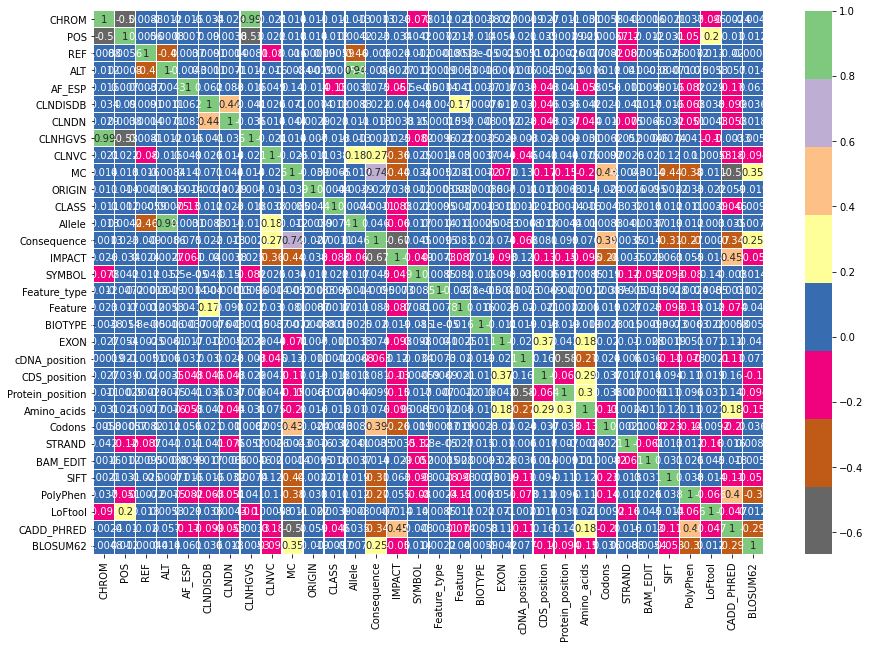

In [49]:
plt.figure(figsize = (15, 10))
sns.heatmap(gen_var.corr(), linewidths = .5, annot = True, cmap = plt.cm.Accent_r)

In [50]:
gen_var.drop(['CHROM', 'ALT'], axis = 1, inplace = True)

In [51]:
gen_var.shape

(65188, 30)

In [52]:
X = gen_var.drop('CLASS', axis = 1)
Y = pd.DataFrame(gen_var['CLASS'])

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [54]:
# # Create a pipeline
# pipe = Pipeline([("classifier", RandomForestClassifier())])
# # Create dictionary with candidate learning algorithms and their hyperparameters
# grid_param = [
#                 {"classifier": [RandomForestClassifier()],
#                  "classifier__n_estimators": [10, 100, 1000],
#                  "classifier__max_depth":[5,8,15,25,30,None],
#                  "classifier__min_samples_leaf":[1,2,5,10,15,100],
#                  "classifier__max_leaf_nodes": [2, 5,10]}]
# # create a gridsearch of the pipeline, the fit the best model
# gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
# best_model = gridsearch.fit(X_train, Y_train)

# print(best_model.best_estimator_)
# print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))

In [55]:
# Creating an empty Dataframe with Scores
df_accur_roc_score_importance = pd.DataFrame(columns=['Roc_Auc_Score'])
df_accur_score = pd.DataFrame(columns=['Accuracy_Score'])

In [56]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
X_std_scaled = StandardScaler().fit_transform(X)
X_norm_scled = MinMaxScaler().fit_transform(X)
X_robust_scaled = RobustScaler().fit_transform(X)

In [57]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_std_scaled, Y, test_size = 0.3, random_state = 40)
X_rb_train, X_rb_test, Y_rb_train, Y_rb_test = train_test_split(X_robust_scaled, Y, test_size = 0.3, random_state = 40)
X_nm_train, X_nm_test, Y_nm_train, Y_nm_test = train_test_split(X_norm_scled, Y, test_size = 0.3, random_state = 40)

In [58]:
dt.fit(X_sc_train, Y_sc_train)
Y_dt_pred = dt.predict(X_sc_test)
print(classification_report(Y_sc_test, Y_dt_pred))
confusion_matrix(Y_sc_test, Y_dt_pred)

fpr, tpr, _ = metrics.roc_curve(Y_sc_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Standardized Decision Tree'] = [auc_score]
df_accur_score.loc['Standardized Decision Tree'] = [metrics.accuracy_score(Y_sc_test, Y_dt_pred)]

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     14667
           1       0.42      0.44      0.43      4890

    accuracy                           0.71     19557
   macro avg       0.61      0.62      0.61     19557
weighted avg       0.71      0.71      0.71     19557



In [59]:
dt.fit(X_rb_train, Y_rb_train)
Y_dt_pred = dt.predict(X_rb_test)
print(classification_report(Y_rb_test, Y_dt_pred))
confusion_matrix(Y_rb_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_rb_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Robust Decision Tree'] = [auc_score]
df_accur_score.loc['Robust Decision Tree'] = [metrics.accuracy_score(Y_rb_test, Y_dt_pred)]

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     14667
           1       0.42      0.44      0.43      4890

    accuracy                           0.71     19557
   macro avg       0.61      0.62      0.61     19557
weighted avg       0.71      0.71      0.71     19557



In [60]:
dt.fit(X_nm_train, Y_nm_train)
Y_dt_pred = dt.predict(X_nm_test)
print(classification_report(Y_nm_test, Y_dt_pred))
confusion_matrix(Y_nm_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_nm_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Normalized Decision Tree'] = [auc_score]
df_accur_score.loc['Normalized Decision Tree'] = [metrics.accuracy_score(Y_nm_test, Y_dt_pred)]

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     14667
           1       0.42      0.44      0.43      4890

    accuracy                           0.71     19557
   macro avg       0.61      0.62      0.61     19557
weighted avg       0.71      0.71      0.71     19557



In [61]:
rf.fit(X_sc_train, Y_sc_train)
Y_rf_pred = rf.predict(X_sc_test)
print(classification_report(Y_sc_test, Y_rf_pred))
confusion_matrix(Y_sc_test, Y_rf_pred)
fpr, tpr, _ = metrics.roc_curve(Y_sc_test, Y_rf_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Standardized Random Forest'] = [auc_score]
df_accur_score.loc['Standardized Random Forest'] = [metrics.accuracy_score(Y_sc_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14667
           1       0.61      0.25      0.35      4890

    accuracy                           0.77     19557
   macro avg       0.70      0.60      0.61     19557
weighted avg       0.75      0.77      0.73     19557



In [62]:
rf.fit(X_rb_train, Y_rb_train)
Y_dt_pred = rf.predict(X_rb_test)
print(classification_report(Y_rb_test, Y_dt_pred))
confusion_matrix(Y_rb_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_rb_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Robust Random Forest'] = [auc_score]
df_accur_score.loc['Robust Random Forest'] = [metrics.accuracy_score(Y_rb_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14667
           1       0.61      0.25      0.35      4890

    accuracy                           0.77     19557
   macro avg       0.70      0.60      0.61     19557
weighted avg       0.75      0.77      0.73     19557



In [63]:
rf.fit(X_nm_train, Y_nm_train)
Y_dt_pred = rf.predict(X_nm_test)
print(classification_report(Y_nm_test, Y_dt_pred))
confusion_matrix(Y_nm_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_nm_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Normalized Random Forest'] = [auc_score]
df_accur_score.loc['Normalized Random Forest'] = [metrics.accuracy_score(Y_nm_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14667
           1       0.60      0.24      0.34      4890

    accuracy                           0.77     19557
   macro avg       0.70      0.59      0.60     19557
weighted avg       0.74      0.77      0.73     19557



In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_sc_train, Y_sc_train)
Y_dt_pred = knn.predict(X_sc_test)
print(classification_report(Y_sc_test, Y_dt_pred))
confusion_matrix(Y_sc_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_sc_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Standardized KNN'] = [auc_score]
df_accur_score.loc['Standardized KNN'] = [metrics.accuracy_score(Y_sc_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.77      0.89      0.83     14667
           1       0.40      0.22      0.28      4890

    accuracy                           0.72     19557
   macro avg       0.59      0.55      0.55     19557
weighted avg       0.68      0.72      0.69     19557



In [65]:
knn.fit(X_rb_train, Y_rb_train)
Y_dt_pred = knn.predict(X_rb_test)
print(classification_report(Y_rb_test, Y_dt_pred))
confusion_matrix(Y_rb_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_rb_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Robust KNN'] = [auc_score]
df_accur_score.loc['Robust KNN'] = [metrics.accuracy_score(Y_rb_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.78      0.89      0.83     14667
           1       0.42      0.24      0.31      4890

    accuracy                           0.73     19557
   macro avg       0.60      0.57      0.57     19557
weighted avg       0.69      0.73      0.70     19557



In [66]:
knn.fit(X_nm_train, Y_nm_train)
Y_dt_pred = knn.predict(X_nm_test)
print(classification_report(Y_nm_test, Y_dt_pred))
confusion_matrix(Y_nm_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_nm_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Normalized KNN'] = [auc_score]
df_accur_score.loc['Normalized KNN'] = [metrics.accuracy_score(Y_nm_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.77      0.89      0.82     14667
           1       0.37      0.20      0.26      4890

    accuracy                           0.71     19557
   macro avg       0.57      0.54      0.54     19557
weighted avg       0.67      0.71      0.68     19557



In [67]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.1,eta=0.4,booster="gbtree",
                              base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)
xgb_model.fit(X_sc_train, Y_sc_train)
Y_dt_pred = xgb_model.predict(X_sc_test)
print(classification_report(Y_sc_test, Y_dt_pred))
confusion_matrix(Y_sc_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_sc_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Standardized XGB'] = [auc_score]
df_accur_score.loc['Standardized XGB'] = [metrics.accuracy_score(Y_sc_test, Y_dt_pred)]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14667
           1       0.63      0.23      0.34      4890

    accuracy                           0.77     19557
   macro avg       0.71      0.59      0.60     19557
weighted avg       0.75      0.77      0.73     19557



In [68]:
xgb_model.fit(X_rb_train, Y_rb_train)
Y_dt_pred = xgb_model.predict(X_rb_test)
print(classification_report(Y_rb_test, Y_dt_pred))
confusion_matrix(Y_rb_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_rb_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Robust XGB'] = [auc_score]
df_accur_score.loc['Robust XGB'] = [metrics.accuracy_score(Y_rb_test, Y_dt_pred)]

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     14667
           1       0.64      0.23      0.34      4890

    accuracy                           0.78     19557
   macro avg       0.72      0.59      0.60     19557
weighted avg       0.75      0.78      0.73     19557



In [69]:
xgb_model.fit(X_nm_train, Y_nm_train)
Y_dt_pred = xgb_model.predict(X_nm_test)
print(classification_report(Y_nm_test, Y_dt_pred))
confusion_matrix(Y_nm_test, Y_dt_pred)
fpr, tpr, _ = metrics.roc_curve(Y_nm_test, Y_dt_pred)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Normalized XGB'] = [auc_score]
df_accur_score.loc['Normalized XGB'] = [metrics.accuracy_score(Y_nm_test, Y_dt_pred)]

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14667
           1       0.63      0.23      0.34      4890

    accuracy                           0.77     19557
   macro avg       0.71      0.59      0.60     19557
weighted avg       0.75      0.77      0.73     19557



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

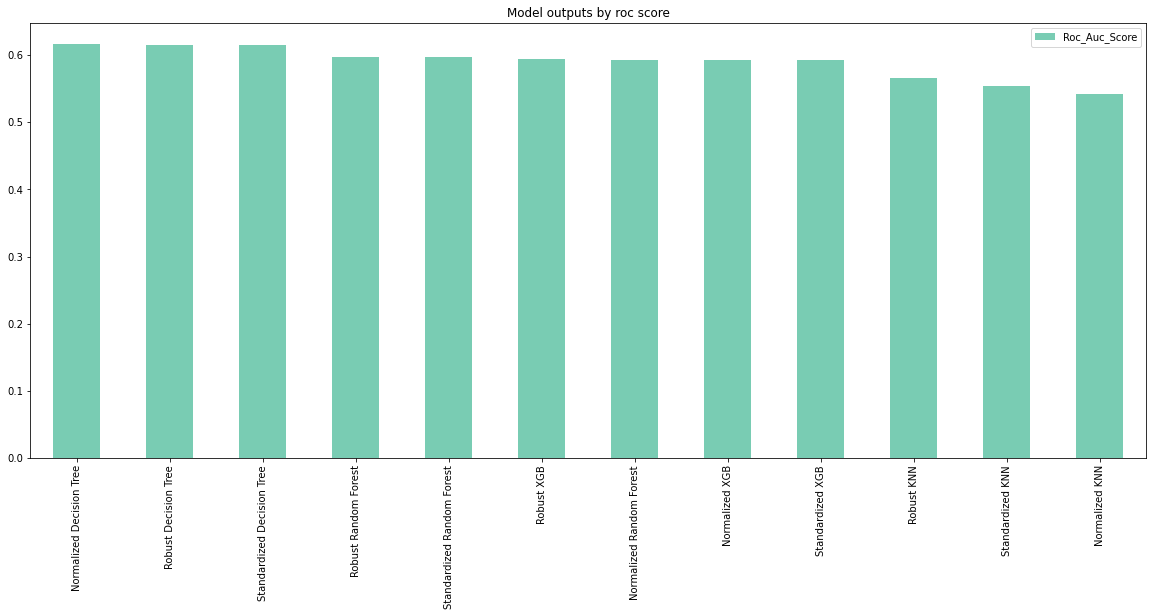

In [70]:
df_accur_roc_score_importance.sort_values(by=['Roc_Auc_Score'],ascending=False).plot(kind='bar', y='Roc_Auc_Score',figsize=(20,8),color='#79ccb3', rot=0,title="Model outputs by roc score")
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

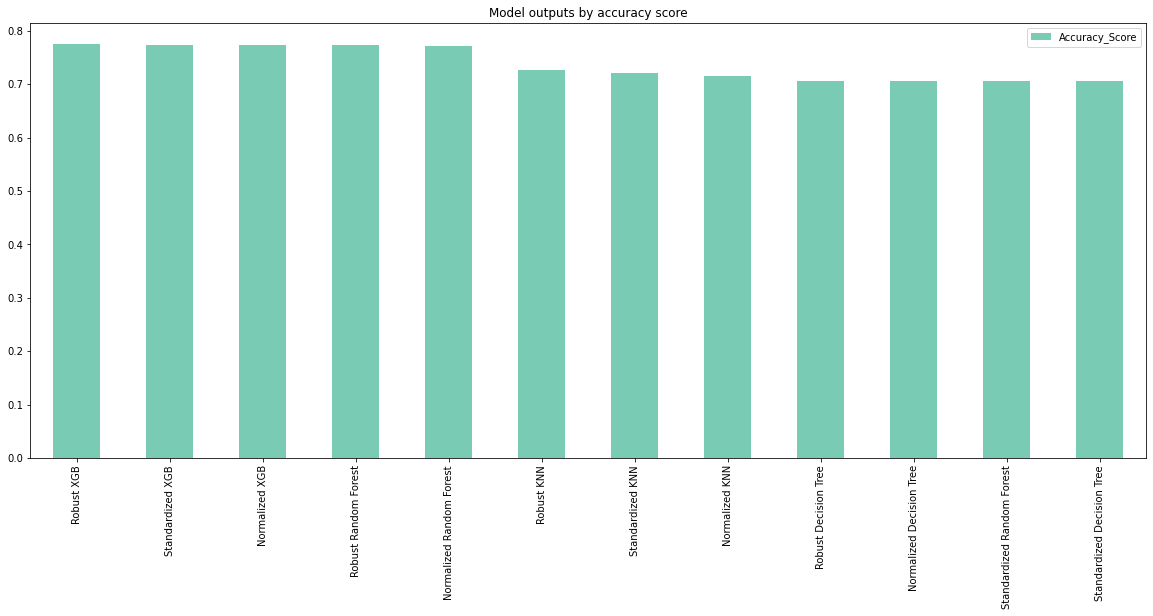

In [71]:
df_accur_score.sort_values(by=['Accuracy_Score'],ascending=False).plot(kind='bar', y='Accuracy_Score',figsize=(20,8),color='#79ccb3', rot=0,title="Model outputs by accuracy score")
plt.xticks(rotation='vertical')

In [72]:
df_accur_score.sort_values(by = 'Accuracy_Score', ascending = False)

,Accuracy_Score
Robust XGB,0.775732
Standardized XGB,0.773483
Normalized XGB,0.773380
Robust Random Forest,0.772511
Normalized Random Forest,0.770619
Robust KNN,0.727310
Standardized KNN,0.721379
Normalized KNN,0.714527
Robust Decision Tree,0.705988
Normalized Decision Tree,0.705988
